# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src=images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Questions to answer for the used car dealership client:**

*   What features most strongly influence car prices?
*   Which car characteristics should the dealership prioritize in their inventory?
*   What pricing strategies can maximize profit margins?
*   Are there undervalued market segments to target?

**Possible success criteria:**

*   Identify top 4 factors driving price variation
*   Quantify impact of each factor on price
*   Provide actionable recommendations for inventory decisions

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
prefix = '/content/drive/MyDrive/Colab Notebooks/practical_application_II_starter/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd

path = 'data/vehicles.csv'
try:
  path = prefix + path
except NameError:
  pass

df = pd.read_csv(path)

image_path = 'images/'
try:
  image_path = prefix + image_path
except NameError:
  pass

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [237]:
# Which features have the most missing data?
# Column categorization, uniqueness and null percentages
data_types = {
    'Continuous': ['price', 'year', 'odometer'],
    'Ordinal': ['condition', 'size', 'cylinders'],
    'Nominal': ['region', 'manufacturer', 'model', 'fuel', 'title_status',
               'transmission', 'VIN', 'drive', 'type', 'paint_color', 'state'],
    'Identifier': ['id']
}

type_summary = []
for data_type, columns in data_types.items():
    for col in columns:
        if col in df.columns:  # Check if column exists
            type_summary.append({
                'Column': col,
                'Category': data_type,
                'Unique_Count': df[col].nunique(),
                'Null_Count': df[col].isnull().sum(),
                'Null_Percentage': round((df[col].isnull().sum() / len(df)) * 100, 1)
            })

type_df = pd.DataFrame(type_summary)
type_df = type_df.sort_values('Null_Percentage', ascending=False)
print(type_df)

          Column    Category  Unique_Count  Null_Count  Null_Percentage
4           size     Ordinal             4      306361             71.8
5      cylinders     Ordinal             8      177678             41.6
3      condition     Ordinal             6      174104             40.8
12           VIN     Nominal        118246      161042             37.7
13         drive     Nominal             3      130567             30.6
15   paint_color     Nominal            12      130203             30.5
14          type     Nominal            13       92858             21.8
7   manufacturer     Nominal            42       17646              4.1
10  title_status     Nominal             6        8242              1.9
8          model     Nominal         29649        5277              1.2
2       odometer  Continuous        104870        4400              1.0
9           fuel     Nominal             5        3013              0.7
11  transmission     Nominal             3        2556          

**Dataset Characteristics:**

* 426,880 car listings
* 18 features including price, year, manufacturer, model, condition, etc.
* Missing data varies by feature

**Potential Features to Analyze:**

* Continuous: price, year, odometer
* Ordinal: condition, size, cylinders
* Nominal: manufacturer, fuel, transmission, paint_color, state

**Initial Data Questions:**

* Which features have the most missing data?
* What's the price distribution?
* Are there obvious outliers or data quality issues?

In [300]:
# Price summary statistics
print("Price Distribution Summary:")
print(df['price'].describe())
print(f"\nPrice Range: ${df['price'].min():,.0f} - ${df['price'].max():,.0f}")
print(f"Median Price: ${df['price'].median():,.0f}")
print(f"Mean Price: ${df['price'].mean():,.0f}")

Price Distribution Summary:
count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

Price Range: $0 - $3,736,928,711
Median Price: $13,950
Mean Price: $75,199


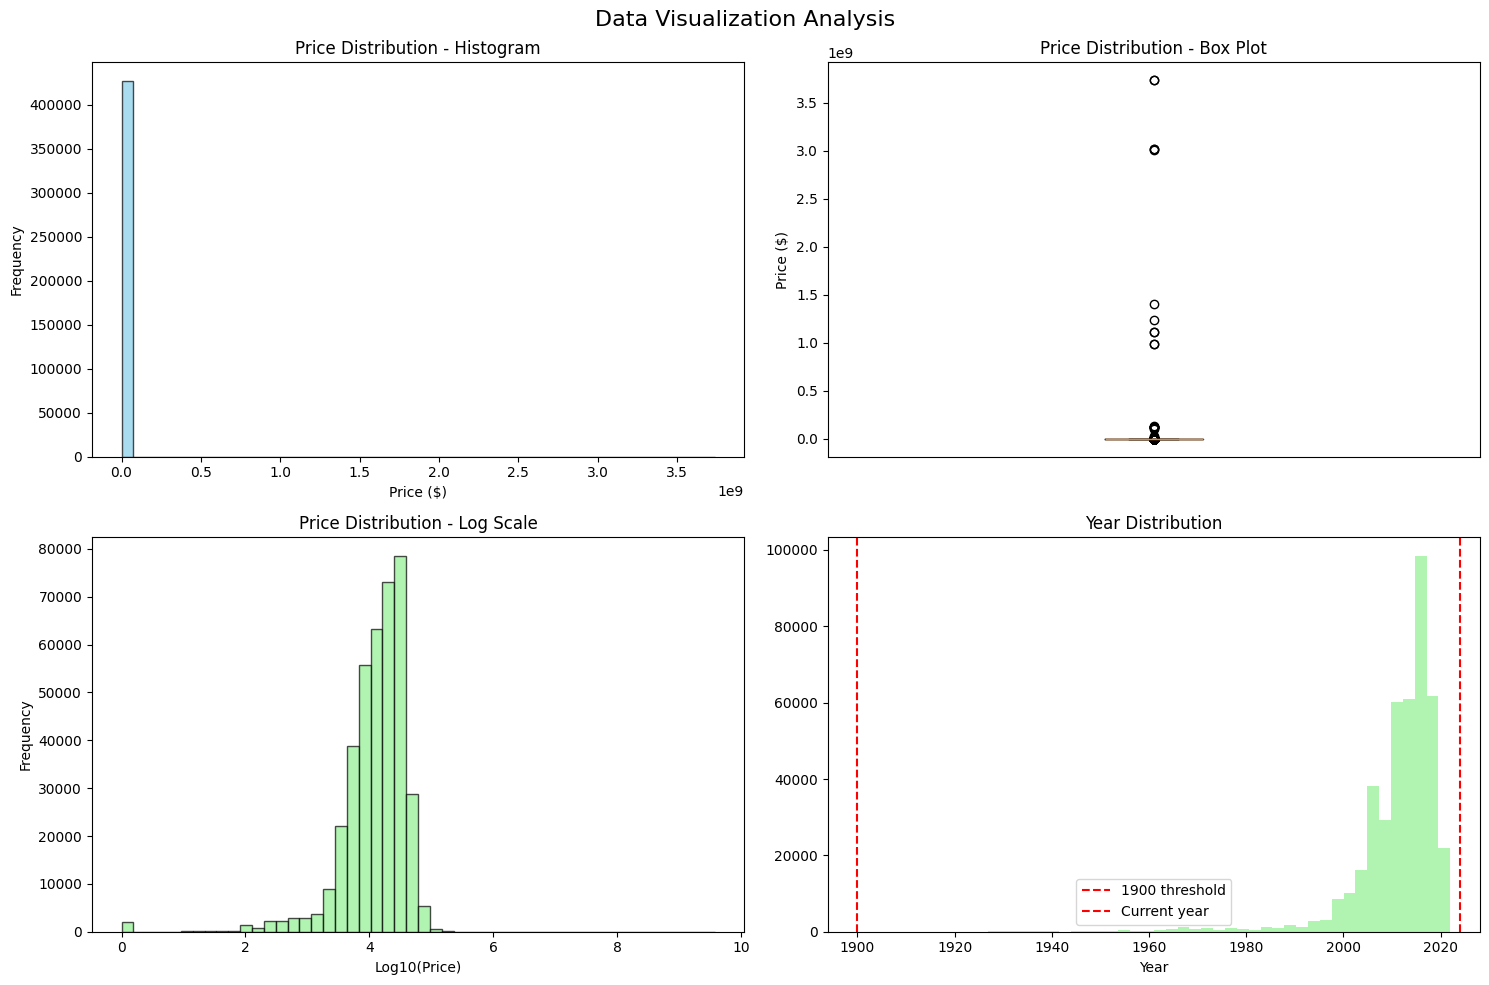

In [62]:
import matplotlib.pyplot as plt

# subplots for multiple views of price distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Data Visualization Analysis', fontsize=16)

# Histogram
axes[0,0].hist(df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Price Distribution - Histogram')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')

# Box plot to show outliers
axes[0,1].boxplot(df['price'])
axes[0,1].set_title('Price Distribution - Box Plot')
axes[0,1].set_ylabel('Price ($)')
axes[0,1].tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Log scale histogram
price_positive = df[df['price'] > 0]['price']  # Remove zeros/negatives for log
axes[1,0].hist(np.log10(price_positive), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Price Distribution - Log Scale')
axes[1,0].set_xlabel('Log10(Price)')
axes[1,0].set_ylabel('Frequency')

# Year distribution
axes[1,1].hist(df['year'].dropna(), bins=50, alpha=0.7, color='lightgreen')
axes[1,1].axvline(1900, color='red', linestyle='--', label='1900 threshold')
axes[1,1].axvline(2024, color='red', linestyle='--', label='Current year')
axes[1,1].set_title('Year Distribution')
axes[1,1].set_xlabel('Year')
axes[1,1].legend()

plt.tight_layout()
plt.savefig(image_path + 'Data_visualize_plot.png')
plt.show()





### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

# Domain knowlege and intuition leads me to believe likely important features in dataset:

* year (age depreciation)
* odometer (wear depreciation)
* manufacturer (brand premium)
* condition (physical state)
* fuel (gas vs. hybrid/electric)

# Data cleanup:
* Remove outliers in price
* Price will need to be scaled to avoid float overflows on polynomial transforms

# Missing data strategy:
* Drop rows with null **fuel**, **odometer** and **year** features (small number)
* **size** >50% missing we'll ignore that feature entirely
* missing **condition** data will be filled with value "*fair*" as a neutral assumption
* missing **cylinders** data will be filled with "*4 cylinders*" since this is the most common configuration

# Feature engineering
* Create car age: car_age = 2025 - year
* Ordinal encoding for condition, size
* One-hot encoding for manufacturer, fuel type



In [42]:
df_clean = df.copy()

In [43]:
# DATA CLEANUP
# Lets handle the price variance problem by removing cars with price with price <= $500 or > $100,000

# Check current dataset size
print(f"Original dataset size: {len(df):,}")
print(f"Original price range: ${df['price'].min():,} - ${df['price'].max():,}")

# Remove cars with price < $500 or > $100,000
df_clean = df_clean[(df_clean['price'] >= 500) & (df_clean['price'] <= 100000)]

# Show what was removed
removed_low = df[df['price'] < 500]
removed_high = df[df['price'] > 100000]

print(f"\nCleaned dataset size: {len(df_clean):,}")
print(f"Cleaned price range: ${df_clean['price'].min():,} - ${df_clean['price'].max():,}")

print(f"\nRemoved {len(removed_low):,} cars priced under $500")
print(f"Removed {len(removed_high):,} cars priced over $100,000")
print(f"Total removed: {len(removed_low) + len(removed_high):,} cars ({((len(df) - len(df_clean))/len(df)*100):.1f}%)")

Original dataset size: 426,880
Original price range: $0 - $3,736,928,711

Cleaned dataset size: 384,131
Cleaned price range: $500 - $100,000

Removed 42,094 cars priced under $500
Removed 655 cars priced over $100,000
Total removed: 42,749 cars (10.0%)


In [44]:
# MISSING DATA STRATEGY part 1
# to avoid overfitting problems with our predictive model we want to preserve data points so we judiciously drop na columns
print(f"Cleaned dataset size: {len(df_clean):,}")

for col in ['fuel', 'odometer', 'year']:
    na_count = df_clean[col].isnull().sum()
    na_percentage = (na_count / len(df_clean)) * 100
    print(f"{col}: Removed {na_count:,} NA values ({na_percentage:.1f}%)")


df_clean.dropna(subset=["odometer", "year"], inplace=True)


Cleaned dataset size: 384,131
fuel: Removed 2,593 NA values (0.7%)
odometer: Removed 2,115 NA values (0.6%)
year: Removed 1,172 NA values (0.3%)


In [45]:
# MISSING DATA STRATEGY part 2:
# fill na with reasonable defaults
print(f"Cleaned dataset size: {len(df_clean):,}")

for col in ['condition', 'cylinders', 'fuel']:
    na_count = df_clean[col].isnull().sum()
    na_percentage = (na_count / len(df_clean)) * 100
    print(f"{col}: Filled {na_count:,} NA values ({na_percentage:.1f}%)")

# fill na condition column to fair as a reasonable default value
df_clean['condition'] = df_clean['condition'].fillna('fair')
# fill na cylinder column to 4 cylinders as default value (most common)
df_clean['cylinders'] = df_clean['cylinders'].fillna('4 cylinders')
# fill na fuel column to gas as default value (most common)
df_clean['fuel'] = df_clean['fuel'].fillna('gas')

Cleaned dataset size: 380,907
condition: Filled 143,495 NA values (37.7%)
cylinders: Filled 155,707 NA values (40.9%)
fuel: Filled 2,125 NA values (0.6%)


In [46]:
# FEATURE ENGINEERING
# Create car age: car_age = 2025 - year
df_clean['age'] = 2025 - df_clean['year']

# Ordinal Mapping for condition
condition_mapping = {
    'salvage': 1,
    'fair': 2,
    'good': 3,
    'excellent': 4,
    'like new': 5,
    'new': 6
}

df_clean['condition_ordinal'] = df_clean['condition'].map(condition_mapping)

# Ordinal Mapping for cylinders
other_cylinders_mask = df_clean['cylinders'].str.contains('other', case=False, na=False)
print(f"Dropping cars with 'other' cylinders: {len(df_clean[other_cylinders_mask])}")
df_clean = df_clean[~other_cylinders_mask]

cylinder_mapping = {
    '3 cylinders': 3,
    '4 cylinders': 4,
    '5 cylinders': 5,
    '6 cylinders': 6,
    '8 cylinders': 8,
    '10 cylinders': 10,
    '12 cylinders': 12
}

df_clean['cylinders_ordinal'] = df_clean['cylinders'].map(cylinder_mapping)

Dropping cars with 'other' cylinders: 1058


In [47]:
# Check current fuel values
print("Current fuel types:")
print(df_clean['fuel'].value_counts(dropna=False))

# Create one-hot encoding
fuel_encoded = pd.get_dummies(df_clean['fuel'], prefix='fuel', dummy_na=False)

print(f"\nOne-hot encoded columns created:")
print(fuel_encoded.columns.tolist())

# Add encoded columns to main dataframe
df_clean = pd.concat([df_clean, fuel_encoded], axis=1)

print(f"\nSample of encoded fuel columns:")
print(fuel_encoded.head())

Current fuel types:
fuel
gas         320863
other        27272
diesel       25581
hybrid        4729
electric      1404
Name: count, dtype: int64

One-hot encoded columns created:
['fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other']

Sample of encoded fuel columns:
    fuel_diesel  fuel_electric  fuel_gas  fuel_hybrid  fuel_other
27        False          False      True        False       False
28        False          False      True        False       False
29        False          False      True        False       False
30        False          False      True        False       False
31        False          False      True        False       False


In [48]:
# drop all unused columns to save memory and speed up number crunching:
df_clean.drop(columns=["year", "id", "region", "model", "title_status", "transmission", "VIN", "drive", "size", "type", "paint_color", "state", "condition", "cylinders", "fuel"], inplace=True)

In [49]:
from sklearn.preprocessing import StandardScaler
# scale odometer as a predictive feature because if not it will lead to floating point overflow during polynomial features transformations
scaler = StandardScaler()
numerical_cols = ['odometer']
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

In [50]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 379849 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              379849 non-null  int64  
 1   manufacturer       365833 non-null  object 
 2   odometer           379849 non-null  float64
 3   age                379849 non-null  float64
 4   condition_ordinal  379849 non-null  int64  
 5   cylinders_ordinal  379849 non-null  int64  
 6   fuel_diesel        379849 non-null  bool   
 7   fuel_electric      379849 non-null  bool   
 8   fuel_gas           379849 non-null  bool   
 9   fuel_hybrid        379849 non-null  bool   
 10  fuel_other         379849 non-null  bool   
dtypes: bool(5), float64(2), int64(3), object(1)
memory usage: 22.1+ MB


In [51]:
df_clean.sample()

,price,manufacturer,odometer,age,condition_ordinal,cylinders_ordinal,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
343580,13995,gmc,0.233004,15.0,4,4,False,False,True,False,False


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [52]:
from sklearn.model_selection import train_test_split

# CROSS VALIDATION:
# split the clean data into test and training pieces:
features = df_clean[["age", "odometer", "condition_ordinal", "cylinders_ordinal"]]
target = df_clean["price"]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [53]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def get_MSE_for_degree_k_model(k, features, target):
  _pipelined_model = Pipeline([
    ('vehicle_transform', PolynomialFeatures(degree = k, include_bias=False)),
    ('vehicle_regression', LinearRegression())
  ])
  _pipelined_model.fit(X_train, y_train)
  return mean_squared_error(_pipelined_model.predict(features), target)

ks = np.array(range(1,7))
training_MSEs = [get_MSE_for_degree_k_model(k, X_train, y_train) for k in ks]
validation_MSEs = [get_MSE_for_degree_k_model(k, X_test, y_test) for k in ks]
MSEs_and_k = pd.DataFrame({"k": ks, "training MSE": training_MSEs, "validation MSE": validation_MSEs })
MSEs_and_k

,k,training MSE,validation MSE
0,1,1.641530e+08,1.647051e+08
1,2,1.176842e+08,1.163959e+08
2,3,1.036279e+08,1.022929e+08
3,4,1.003907e+08,1.004173e+08
4,5,9.905649e+07,1.046496e+08
5,6,9.913578e+07,1.748790e+08


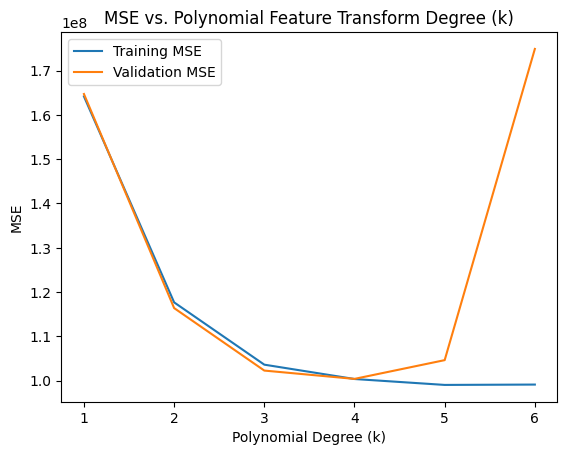

In [60]:
import matplotlib.pyplot as plt
plt.plot(ks, training_MSEs, label='Training MSE')
plt.plot(ks, validation_MSEs, label='Validation MSE')
plt.title('MSE vs. Polynomial Feature Transform Degree (k)')
plt.xlabel('Polynomial Degree (k)')
plt.ylabel('MSE')
plt.legend()
plt.savefig(image_path + 'MSE_poly_degree_plot.png')
plt.show()
# Overfitting exhibited with polynomial transform degree k > 4
# degree = 4 appears to be the min for the validation MSE so we'll go with the pipelined model with polynomial features transform at degree 4 run on linear regression for accurate results

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
my_model = Pipeline([
    ('vehicle_transform', PolynomialFeatures(degree = 4, include_bias=False)),
    ('vehicle_regression', LinearRegression())
])
my_model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = my_model.predict(X_test)
# baseline MSE of my selected model:
baseline_mse = mean_squared_error(y_test, my_model.predict(X_test))
baseline_r2 = r2_score(y_test, y_pred)
print(f"\nBaseline Model Performance:")
print(f"Mean Squared Error: {baseline_mse:,.2f}")
# R² (coefficient of determination) measures how much of the variance in car prices your model explains:
print(f"R² Score: {baseline_r2:.4f}")


# TAKEAWAY: my 0.5077 R² indicates this model is mediocre
# no doubt this can be improved by incorporating additional features for predictions like manufacturer
# my judgement call is that the findings are of interest although far from optimal


Baseline Model Performance:
Mean Squared Error: 100,417,253.67
R² Score: 0.5077


In [56]:

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate permutation importance to see what actually drives the cost of a car...
print("\nCalculating permutation importance...")
perm_importance = permutation_importance(
    my_model, X_test, y_test,
    n_repeats=10,           # Repeat shuffling 10 times for reliability
    random_state=42,
    scoring='neg_mean_squared_error',  # Use MSE
)

# Create results DataFrame
importance_df = pd.DataFrame({
    'feature': features.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std,
    'importance_relative': perm_importance.importances_mean / perm_importance.importances_mean.sum() * 100
}).sort_values('importance_mean', ascending=False)

print("\n" + "="*60)
print("PERMUTATION IMPORTANCE RESULTS")
print("="*60)
print(f"{'Feature':<20} {'Importance':<12} {'Std Dev':<10} {'Relative %':<10}")
print("-" * 60)
for _, row in importance_df.iterrows():
    print(f"{row['feature']:<20} {row['importance_mean']:<12.0f} "
          f"{row['importance_std']:<10.0f} {row['importance_relative']:<10.1f}%")



Calculating permutation importance...

PERMUTATION IMPORTANCE RESULTS
Feature              Importance   Std Dev    Relative %
------------------------------------------------------------
age                  133604188    880522     64.9      %
cylinders_ordinal    37403093     699116     18.2      %
condition_ordinal    20137707     8128193    9.8       %
odometer             14726712     1645715    7.2       %


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

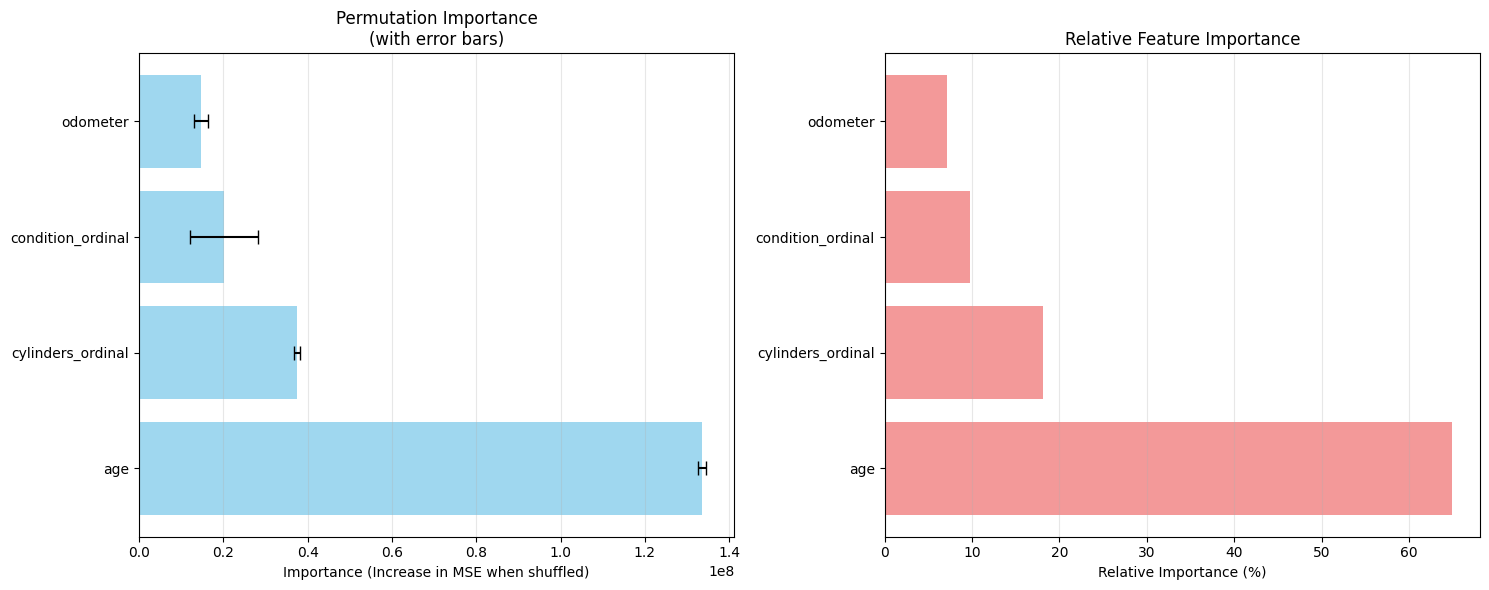


INSIGHTS
• Most important feature: age (64.9% of total importance)
• Least important feature: odometer (7.2% of total importance)

• When 'age' is shuffled, MSE increases by ~$133,604,188
• When 'odometer' is shuffled, MSE increases by ~$14,726,712

• The most important feature is 9.1x more important than the least important feature


In [61]:
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Permutation importance plot
ax1.barh(importance_df['feature'], importance_df['importance_mean'],
         xerr=importance_df['importance_std'], capsize=5, color='skyblue', alpha=0.8)
ax1.set_xlabel('Importance (Increase in MSE when shuffled)')
ax1.set_title('Permutation Importance\n(with error bars)')
ax1.grid(axis='x', alpha=0.3)

# Relative percentage plot
ax2.barh(importance_df['feature'], importance_df['importance_relative'],
         color='lightcoral', alpha=0.8)
ax2.set_xlabel('Relative Importance (%)')
ax2.set_title('Relative Feature Importance')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig(image_path + 'Permutation_importance_plot.png')
plt.show()

# Additional insights
print("\n" + "="*60)
print("INSIGHTS")
print("="*60)
most_important = importance_df.iloc[0]
least_important = importance_df.iloc[-1]

print(f"• Most important feature: {most_important['feature']} "
      f"({most_important['importance_relative']:.1f}% of total importance)")
print(f"• Least important feature: {least_important['feature']} "
      f"({least_important['importance_relative']:.1f}% of total importance)")

print(f"\n• When '{most_important['feature']}' is shuffled, MSE increases by "
      f"~${most_important['importance_mean']:,.0f}")
print(f"• When '{least_important['feature']}' is shuffled, MSE increases by "
      f"~${least_important['importance_mean']:,.0f}")

# Feature importance ratio
importance_ratio = most_important['importance_mean'] / least_important['importance_mean']
print(f"\n• The most important feature is {importance_ratio:.1f}x more important "
      f"than the least important feature")

In [ ]:
# Surprising finding seems to be that age is so much more important than odometer by a relative factor of 9.1 also notable is is that the cylinder count seems to outweigh the importance of the condition of the car but I suspect this is do to the mediocrity of my model and not properly taking brand premium into account.

## What are the findings?
# The findings suggest that the age of the car is the most important factor in determining the price of a car. My analysis used only used the year (age depreciation), odometer (wear depreciation), and condition (physical state) to predict the price of the car. In order to improve the model, I would recommend using additional features such as the manufacturer (brand premium), the type of car (e.g. SUV, Sedan, Coupe), the size of the car (e.g. compact, mid-size, full-size), and the transmission type (e.g. automatic, manual). Perhaps I could also use the fuel type (e.g. gas, diesel, hybrid, electric) to improve the model.

# ## What do I recommend?
# Based upon my findings, I recommend that the dealership focus on selling cars that are less than 5 years old. The dealership should also focus on selling cars that are in good condition and have low mileage, but the dominance of the age of the car in the model suggests that this is the most important factor in determining the price of a car.